# MA336: Artificial intelligence and machine learning with applications
##### Name: Faryal Zaidi

##### Registration Number: 2211398

##### Department: Mathematical Sciences

##### Submitted to: Dr Wenxing Guo

# <font color=green>Final Project:</font> Time Series Analysis of Sunspots data with Artificial Neural Networks


## Introduction:
Sunspots are dark spots on the sun's surface that change in number and size over time. They provide valuable information for studying solar and stellar physics, specifically the solar cycle, which is an 11-year pattern of solar activity driven by magnetic field changes. Sunspots, characterized by concentrated magnetic fields and cooler temperatures, are linked to higher levels of solar activity and the discharge of energetic particles that affect Earth's atmosphere and space instruments. Additionally, solar activity may impact terrestrial climate. By analyzing the variation in sunspot numbers, we can monitor, understand, and predict the effects of the solar cycle. In this analysis, we aim to model and forecast sunspot numbers using historical data dating back to 1749, sourced from Kaggle.

## Preliminary Analysis of Dataset:
The input data consists of a time series spanning over 250 years. It includes a single variable called 'Monthly Mean Total Sunspot Number', recorded at the end of each month, from Jan 1749 to Jan 2021. The average sunspot count is 81.78, with a range of 0 to a maximum range of 398.2.

During the preliminary analysis, we performed a basic examination of the dataset. By reading and cleaning the data, we determined the total number of rows and columns. We observed that the date format in the dataset was inconsistent, specifically changing after record number 1812. Recognizing the potential impact on our analysis, we standardized the date format for the entire dataset and removed any missing records.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [19]:
import pandas as pd

#loading data set using pandas

# File path in my laptop
# df = pd.read_csv(r"C:/Users/dell/Downloads/week 4/Sunspots.csv", encoding='ISO-8859-1',names=['month', 'date', 'sunspot'], header=0)

# I have used Colab and upload my dataset in the colab file folder
df = pd.read_csv(r"Sunspots.csv", encoding='ISO-8859-1',names=['month', 'date', 'sunspot'], header=0)
print(df.isna().sum())
# there is no missing values as results of sum is 0

# converting Date Format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()
print(df.head(5))
max_sunspot = df.sunspot.values.max()
print('Max sunspot recorded: ', max_sunspot)


month      0
date       0
sunspot    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    3265 non-null   int64         
 1   date     3265 non-null   datetime64[ns]
 2   sunspot  3265 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 76.6 KB
   month       date  sunspot
0      0 1749-01-31     96.7
1      1 1749-02-28    104.3
2      2 1749-03-31    116.7
3      3 1749-04-30     92.8
4      4 1749-05-31    141.7
Max sunspot recorded:  398.2


Upon analyzing the dataset and executing the code above, it becomes apparent that the dataset comprises solely three columns:

1. An untitled column containing the month number.
2. The Date column, formatted as YYYY-MM-DD.
3. Mean Total Sunspot Number.

For the purpose of this project, only the month number and the mean total sunspot number are necessary. These specific columns will be loaded into memory and converted into arrays, effectively representing a time series.

In [4]:
# In order to visualize time series of sunspots we make a function called "Plot_time_series"
def plot_time_series(x_axis, y_axis, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    # Setup of the graph figure's dimensions
    plt.figure(figsize=(10, 6))

    # Checking whether there are more than two series
    if type(y_axis) is tuple:

      # Looping on the y axis elements
      for y_curr in y_axis:

        # Ploting the x axis and current y axis values
        plt.plot(x_axis[start:end], y_curr[start:end], format)

    else:
      # Ploting the x axis and the y axis values
      plt.plot(x_axis[start:end], y_axis[start:end], format)

    # Labeling the x-axis
    plt.xlabel(xlabel)

    # Labeling the y-axis
    plt.ylabel(ylabel)

    # legend is set here
    if legend:
      plt.legend(legend)

    # Title is set here
    plt.title(title)
    # Add a grid to the graph.
    plt.grid(True)
    # Graph is drawn on the screen
    plt.show()

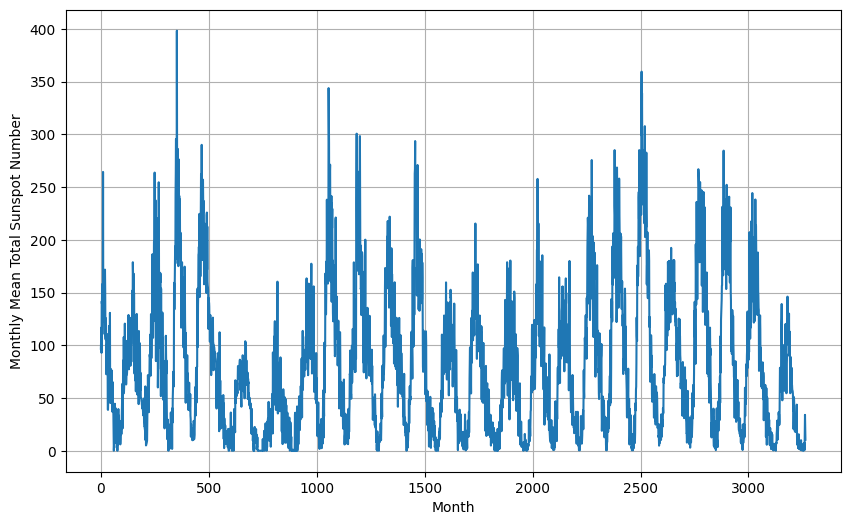

In [17]:
# list initialization
time_list = []
sunspots_list = []

# Opening our CSV dataset file
with open('Sunspots.csv') as csvfile:

  # begin the reader
  reader = csv.reader(csvfile, delimiter=',')

  # first line is the heading, so you can skip it
  next(reader)

  # adding the sunspot and the row number to lists
  for row in reader:
    time_list.append(int(row[0]))
    sunspots_list.append(float(row[2]))

# list to numpy arrays conversion
time_array = np.array(time_list)
series_array = np.array(sunspots_list)

# viewing the data for a sneak-peak
plot_time_series(time_array, series_array, xlabel='Month', ylabel='Monthly Mean Total Sunspot Number')

<Axes: xlabel='date'>

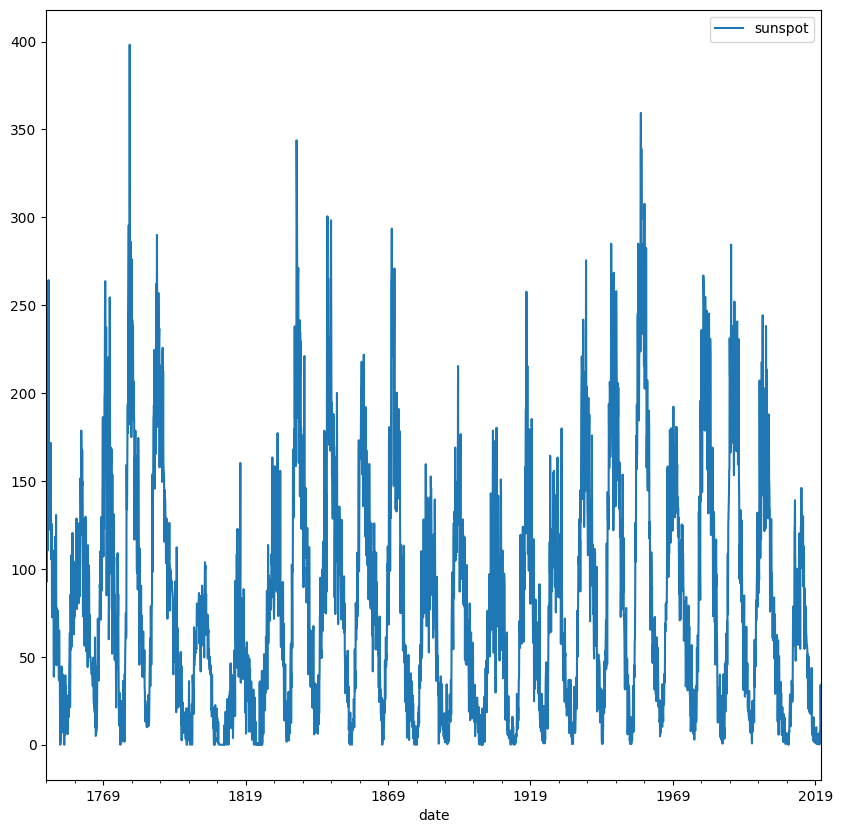

In [18]:
# Plotting with respect to date and sunspot number
df.plot('date', 'sunspot', figsize=(15,10))



To more clearly observe the trend and average out the month-to-month fluctuation, we can also plot the average for the year.

<Axes: xlabel='date'>

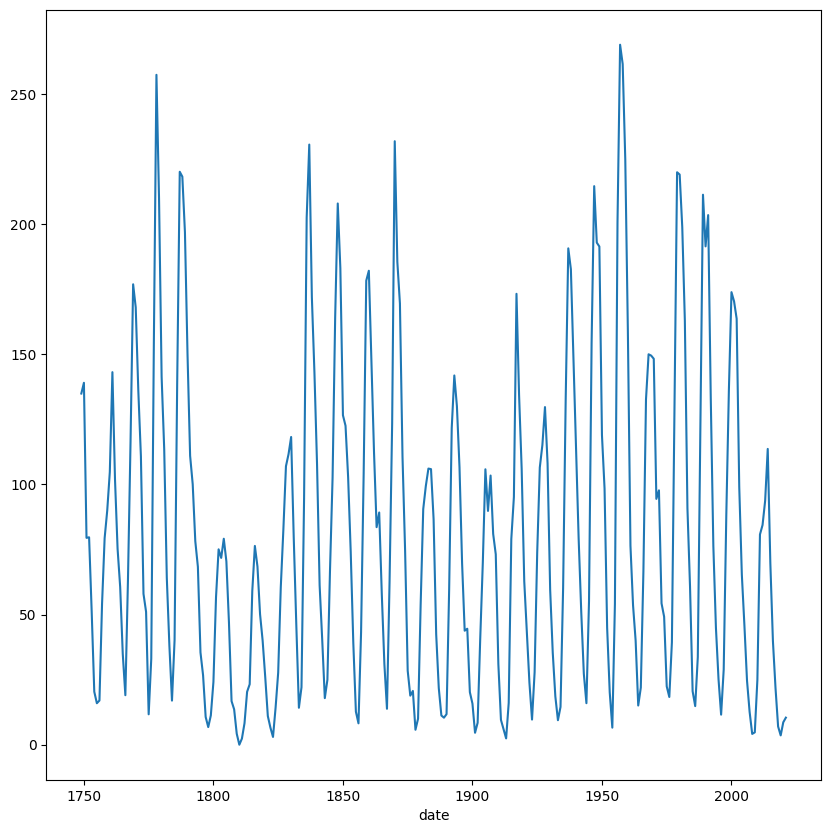

In [20]:
df.groupby(df.date.dt.year)['sunspot'].mean().plot(figsize=(10,10))

In [8]:
# The Monthly Mean Total Sunspot Number summarised statistically:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,3265.0,1632.000000,942.668641,0.0,816.0,1632.0,2448.0,3264.0
sunspot,3265.0,81.778775,67.889277,0.0,23.9,67.2,122.5,398.2


# <font color=green>Method:</font> Deep Neural Network(DNN)
A powerful type of artificial neural network called a Deep Neural Network (DNN) can find complex relationships and patterns in data. It is constructed of multiple layers of interconnected neurons. The sunspot dataset is a good fit for DNNs since they are excellent at capturing nonlinear relationships and temporal dependencies.
Unlike other algorithms, DNNs can automatically identify pertinent aspects from the data without the need for manual input. This benefits the sunspot dataset's varied and intricate structure. Other algorithms that rely on linear assumptions or established rules may find it difficult to reflect the complexity of the dataset. We can derive precise predictions and useful insights from the sunspot dataset by utilising the deep architecture and learning capabilities of DNNs.

# Splitting the dataset:
A training set and a validation set will be created from the dataset. The dataset contains 3265 points, of which the first 3000 will be used for training.

In [21]:
# Defining the split condiiton where record number is 3000
split_df = 3000

# for training purposes, training set
time_train = time_array[:split_df]
x_train = series_array[:split_df]

# for testing purposes, test set
time_test = time_array[split_df:]
x_test = series_array[split_df:]

print('Train size: ', len(x_train))
print('Test size: ', len(x_test))

Train size:  3000
Test size:  265


## Generate Dataset Window for visualizing

In [22]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """From the input time series dataset, the function creates time windows, and it then provides a TensorFlow Dataset with these windows.
    """

    # Create a TF Dataset using the values from the series.
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Data windowing, but only retaining those of the set size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Put the window's components in a single batch to flatten it.
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Put features and labels into tuples.
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Adjust the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Make batch of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset


In [23]:
# Setting Parameters for time window
size_of_window = 30
size_of_batch = 32
size_shuffle_buffer = 1000

# Create the windows for the train dataset.
train_set = windowed_dataset(x_train, size_of_window, size_of_batch, size_shuffle_buffer)

### 1. Model Definition DNN ###
A model for predicting sunspot values using a deep neural network architecture. The model consists of three layers:
1. Input Layer: The first layer has 30 units
2. Hidden Layer: The model contains two hidden layers. A Dense layer with 30 units(neurons) makes up the first hidden layer, and a Dense layer with 10 units makes up the second.
3. Output Layer : The final layer has 1 unit

The total number of parameters in the model is 1,251, which includes the weights and biases of the neural network.

To expedite the execution time of my model, which involves 100 epochs, I opted for Google Colab, which significantly reduced the processing duration to approximately 1 minute and 36 seconds.

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

# Build the DNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[size_of_window], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Display the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Set the scheduler for learning rate.
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Here optimizer is initialized (SGD)
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Here we are training the model with 100 epoch
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
93/93 [==============================] - 1s 5ms/step - loss: 46.2798 - lr: 1.0000e-08
Epoch 2/100
93/93 [==============================] - 1s 8ms/step - loss: 46.0517 - lr: 1.1220e-08
Epoch 3/100
93/93 [==============================] - 2s 13ms/step - loss: 45.8040 - lr: 1.2589e-08
Epoch 4/100
93/93 [==============================] - 1s 12ms/step - loss: 45.5436 - lr: 1.4125e-08
Epoch 5/100
93/93 [==============================] - 1s 8ms/step - loss: 45.2729 - lr: 1.5849e-08
Epoch 6/100
93/93 [==============================] - 1s 5ms/step - loss: 44.9935 - lr: 1.7783e-08
Epoch 7/100
93/93 [==============================] - 1s 5ms/step - loss: 44.7011 - lr: 1.9953e-08
Epoch 8/100
93/93 [==============================] - 1s 5ms/step - loss: 44.3966 - lr: 2.2387e-08
Epoch 9/100
93/93 [==============================] - 1s 5ms/step - loss: 44.0831 - lr: 2.5119e-08
Epoch 10/100
93/93 [==============================] - 1s 5ms/step - loss: 43.7576 - lr: 2.8184e-08
Epoch 11/100
93/9

# Train the Model

In [26]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[size_of_window], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])


In [27]:
# Set the learning rate
learning_rate = 2e-5

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=300)


Epoch 1/300
93/93 [==============================] - 1s 5ms/step - loss: 36.7834 - mae: 37.2780
Epoch 2/300
93/93 [==============================] - 1s 5ms/step - loss: 20.6634 - mae: 21.1571
Epoch 3/300
93/93 [==============================] - 1s 4ms/step - loss: 19.0668 - mae: 19.5598
Epoch 4/300
93/93 [==============================] - 1s 4ms/step - loss: 18.4774 - mae: 18.9687
Epoch 5/300
93/93 [==============================] - 1s 4ms/step - loss: 18.3200 - mae: 18.8137
Epoch 6/300
93/93 [==============================] - 1s 5ms/step - loss: 17.8915 - mae: 18.3830
Epoch 7/300
93/93 [==============================] - 1s 5ms/step - loss: 18.1074 - mae: 18.5998
Epoch 8/300
93/93 [==============================] - 1s 4ms/step - loss: 17.5702 - mae: 18.0615
Epoch 9/300
93/93 [==============================] - 1s 7ms/step - loss: 17.5011 - mae: 17.9928
Epoch 10/300
93/93 [==============================] - 1s 7ms/step - loss: 17.3723 - mae: 17.8645
Epoch 11/300
93/93 [===================

In [28]:
print(model.summary())
df_history = pd.DataFrame(history.history)
pd.reset_option('display.float_format')
df_history = df_history.sort_values("loss")
df_history.head(1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________
None


,loss,mae
296,15.277708,15.765465


# Model Evaluation

In [29]:
def model_forecast(model, series, window_size, batch_size):

    """To produce predictions on data windows, the function applies a predetermined TF Keras model.
    The model, time series data, window size, and batch size are all inputs. The generated predictions are returned as an array.
    """

    # Create a TF Dataset using the values from the series.
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Data windowing, but only retaining those of the set size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # By assembling the window's components in one batch, flatten the windows.
    dataset = dataset.flat_map(lambda w: w.batch(window_size))



    # Make batch of windows
    dataset = dataset.batch(batch_size).prefetch(1)



    # Obtain forecasts or predictions for the complete dataset.
    forecast = model.predict(dataset)
    return forecast

9/9 [==============================] - 0s 7ms/step


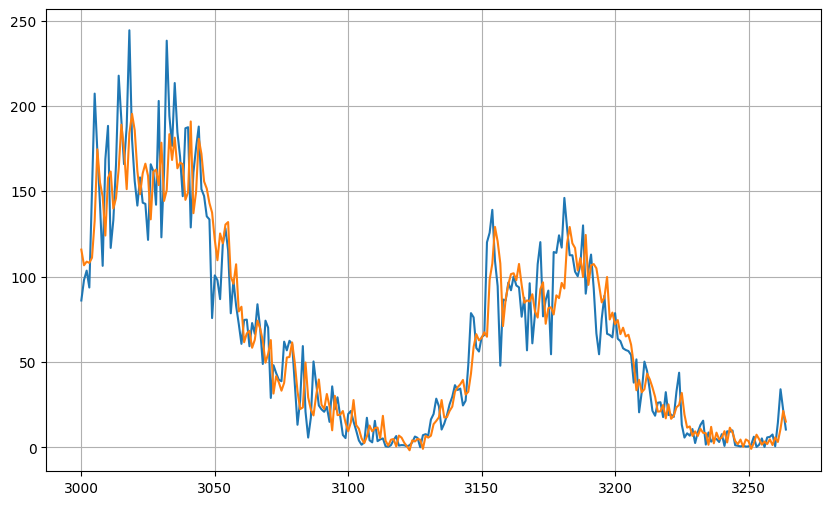

In [30]:
# Reduce the original series
forecast_series = series_array[split_df-size_of_window:-1]



# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, size_of_window, size_of_batch)




# Drop single dimensional axis
results = forecast.squeeze()




# Plot the results
plot_time_series(time_test, (x_test, results))

In [32]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute the MAE, RMSE, R2-Score
print("MAE: ", mean_absolute_error(x_test, results))
print("RMSE: ", math.sqrt(mean_squared_error(x_test, results)))
print("R2-Score: ", r2_score(x_test, results))

MAE:  14.04048209356812
RMSE:  20.288770090476994
R2-Score:  0.8824250785206188


# <font color=green>Results Obtained:</font>
The evaluation of the DNN model on the sunspot time series dataset reveals the following:

MAE (Mean Absolute Error): The difference in real and expected sunspot levels is 14.04 on average. This shows that the model's predictions are typically 14.04 units off the actual sunspot values.

RMSE (Root Mean Squared Error): The square root of the average squared difference between the predicted and actual sunspot values is 20.28. RMSE provides a measure of the overall prediction error magnitude. In this case, the average prediction error is around 20.28 units.

R2-Score: The R2-Score measures the proportion of the sunspot variability explained by the model's predictions. With a value of 0.88, approximately 88% of the sunspot variance can be attributed to the model's predictions.

These results suggest that the DNN model shows promising performance in predicting the sunspot values on the given dataset. The relatively low MAE and RMSE values indicate reasonably accurate predictions, and the high R2-Score indicates a substantial explanation of the sunspot variability. However, it's important to consider the specific date context and objectives of the analysis when interpreting these findings.



##Combining DNN and CNN in the Model

Integrating a DNN with a CNN (1D Convolutional Neural Network) in our model offers valuable benefits. The Conv1D layer excels at capturing local patterns and dependencies in sequential data, while the DNN layers are skilled at understanding complex relationships across the entire dataset. By combining these layers, we can effectively capture both local and global dependencies, enabling us to unveil intricate patterns and relationships in sequential datasets such as time series. This integration enhances our model's analytical capabilities, resulting in improved prediction accuracy and valuable insights.

In [33]:
# Create the windows for the train dataset.
train_set = windowed_dataset(x_train, size_of_window, size_of_batch, size_shuffle_buffer)

# Build the Combined DNN and CNN Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[size_of_window, 1]),
  tf.keras.layers.Dense(30, input_shape=[size_of_window, 1], activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

 # Display summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            256       
                                                                 
 dense_3 (Dense)             (None, 30, 30)            1950      
                                                                 
 dense_4 (Dense)             (None, 30, 10)            310       
                                                                 
 dense_5 (Dense)             (None, 30, 1)             11        
                                                                 
Total params: 2,527
Trainable params: 2,527
Non-trainable params: 0
_________________________________________________________________


## Tuning Learning Rate to become optimal:

As usual, we will be searching for an optimal learning rate.

In [34]:
# Get initial weights
init_weights = model.get_weights()

# Set the scheduler for learning rate.
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the SGD optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


Epoch 1/100
93/93 [==============================] - 2s 7ms/step - loss: 95.2013 - lr: 1.0000e-08
Epoch 2/100
93/93 [==============================] - 1s 6ms/step - loss: 95.0474 - lr: 1.1220e-08
Epoch 3/100
93/93 [==============================] - 1s 7ms/step - loss: 94.8742 - lr: 1.2589e-08
Epoch 4/100
93/93 [==============================] - 1s 6ms/step - loss: 94.6815 - lr: 1.4125e-08
Epoch 5/100
93/93 [==============================] - 1s 6ms/step - loss: 94.4676 - lr: 1.5849e-08
Epoch 6/100
93/93 [==============================] - 1s 6ms/step - loss: 94.2299 - lr: 1.7783e-08
Epoch 7/100
93/93 [==============================] - 1s 6ms/step - loss: 93.9656 - lr: 1.9953e-08
Epoch 8/100
93/93 [==============================] - 1s 9ms/step - loss: 93.6728 - lr: 2.2387e-08
Epoch 9/100
93/93 [==============================] - 1s 10ms/step - loss: 93.3494 - lr: 2.5119e-08
Epoch 10/100
93/93 [==============================] - 1s 8ms/step - loss: 92.9943 - lr: 2.8184e-08
Epoch 11/100
93/93

## Training our Model:
In this step, you have the opportunity to reset the model and initiate the training process. The model is initially configured to train for 100 epochs, which represents the number of times the model will iterate over the entire training dataset. However, you have the flexibility to increase the number of epochs if desired.

In [135]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

# Set the learning rate
learning_rate = 8e-7

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=100)

Epoch 1/100
93/93 [==============================] - 2s 10ms/step - loss: 83.0928 - mae: 83.5902
Epoch 2/100
93/93 [==============================] - 1s 10ms/step - loss: 73.9248 - mae: 74.4213
Epoch 3/100
93/93 [==============================] - 1s 9ms/step - loss: 69.7367 - mae: 70.2335
Epoch 4/100
93/93 [==============================] - 1s 11ms/step - loss: 67.1850 - mae: 67.6819
Epoch 5/100
93/93 [==============================] - 1s 12ms/step - loss: 65.7777 - mae: 66.2748
Epoch 6/100
93/93 [==============================] - 1s 10ms/step - loss: 64.9531 - mae: 65.4503
Epoch 7/100
93/93 [==============================] - 1s 9ms/step - loss: 64.6543 - mae: 65.1516
Epoch 8/100
93/93 [==============================] - 1s 9ms/step - loss: 64.4626 - mae: 64.9599
Epoch 9/100
93/93 [==============================] - 1s 8ms/step - loss: 64.0779 - mae: 64.5753
Epoch 10/100
93/93 [==============================] - 1s 11ms/step - loss: 63.9762 - mae: 64.4735
Epoch 11/100
93/93 [=============

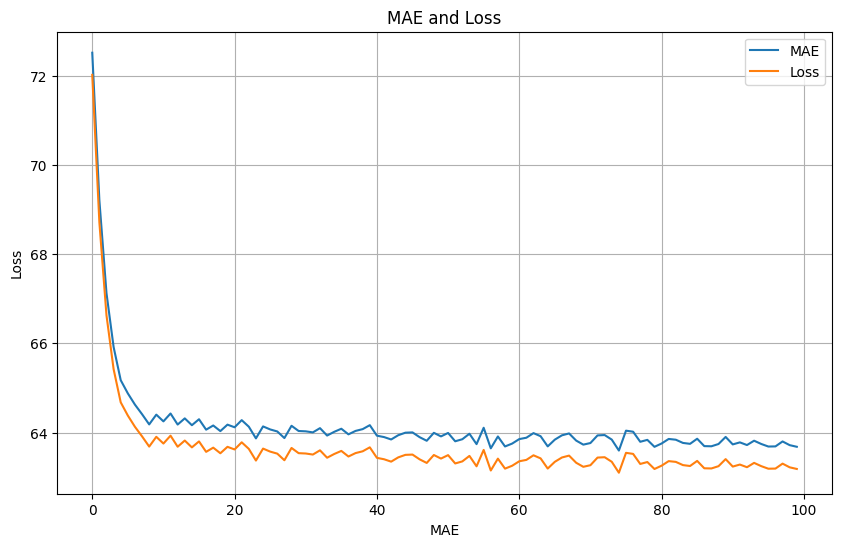

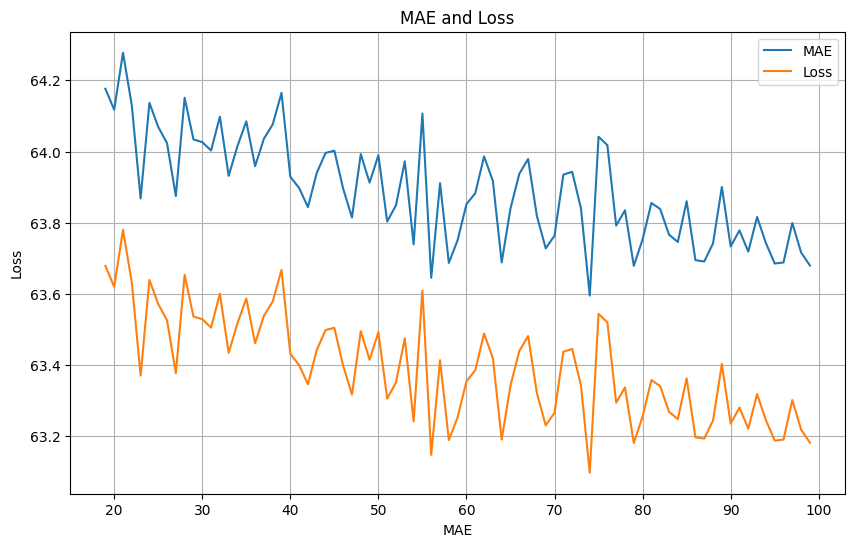

In [128]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_time_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# mae and loss zommed plot
plot_time_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

9/9 [==============================] - 0s 6ms/step


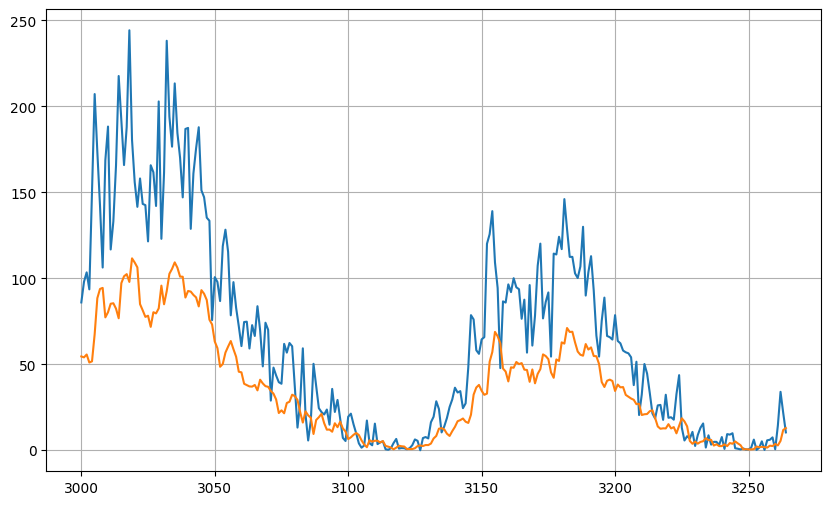

In [130]:
# Reduce the original series
forecast_series = series_array[split_df-size_of_window:-1]
# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, size_of_window, size_of_batch)
# Ensure the shape of forecast matches the shape of x_valid
forecast = forecast[:, -1, 0]
# Plot the results
plot_time_series(time_test, (x_test, forecast))






In [131]:

# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_test, forecast).numpy())

30.411152


It has been observed that the Mean Absolute Error (MAE) value is not satisfactory and the model's predictions are not closely aligned with the actual values, it could indicate that the model is overfitted. To address this issue, a dynamic adjustment of the learning rate is implemented. By dynamically changing the learning rate during training, we aim to make the model perform better. This approach allows the model to adapt its learning rate based on the progress of training, potentially resulting in improved convergence and more reliable predictions.

##Dynamic Learning Rate Scheduling and Performance Evaluation:
In this section, we are exploring a technique to adjust the learning rate dynamically during model training. Initially, a small learning rate is set, and the model is trained for a specific number of epochs. However, as training progresses, the changes in the model's performance become less significant. To address this, we introduce a learning rate scheduler, which modifies the learning rate during training based on predefined rules. In the provided code, an exponential decay scheduler is used, gradually reducing the learning rate over a certain number of steps. This helps the model make more precise adjustments to its parameters, potentially improving convergence and performance. After applying the scheduler, the model is recompiled and trained for additional epochs. The trained model is then used to generate predictions on a test dataset, and evaluation metrics such as mean absolute error, root mean squared error, and R2-score are computed to assess the model's accuracy and performance on unseen data. By dynamically adjusting the learning rate, we aim to enhance the model's training process and improve its predictive capabilities.

In [120]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=10)

Epoch 1/10
93/93 [==============================] - 1s 4ms/step - loss: 15.5700 - mae: 16.0555
Epoch 2/10
93/93 [==============================] - 0s 3ms/step - loss: 15.5694 - mae: 16.0548
Epoch 3/10
93/93 [==============================] - 0s 3ms/step - loss: 15.5699 - mae: 16.0554
Epoch 4/10
93/93 [==============================] - 0s 3ms/step - loss: 15.5699 - mae: 16.0554
Epoch 5/10
93/93 [==============================] - 0s 3ms/step - loss: 15.5702 - mae: 16.0559
Epoch 6/10
93/93 [==============================] - 1s 7ms/step - loss: 15.5696 - mae: 16.0552
Epoch 7/10
93/93 [==============================] - 1s 4ms/step - loss: 15.5700 - mae: 16.0554
Epoch 8/10
93/93 [==============================] - 1s 5ms/step - loss: 15.5691 - mae: 16.0549
Epoch 9/10
93/93 [==============================] - 0s 3ms/step - loss: 15.5687 - mae: 16.0541
Epoch 10/10
93/93 [==============================] - 0s 3ms/step - loss: 15.5699 - mae: 16.0551


As the model continues to learn, the initially set static learning rate may not be optimal anymore. To achieve better improvements, it can be beneficial to gradually decrease the learning rate during each epoch. One approach is to use a decayed learning rate, which can be implemented using a lambda function or the built-in ExponentialDecay() function in the Keras API. This function decays the learning rate according to the formula:

    initial_learning_rate * decay_rate ** (step / decay_steps)

In [121]:
# Set the initial learning rate
initial_learning_rate=1e-7

# Define the scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=400,
    decay_rate=0.96,
    staircase=True)

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=40)

Epoch 1/40
93/93 [==============================] - 1s 4ms/step - loss: 15.5690 - mae: 16.0546
Epoch 2/40
93/93 [==============================] - 0s 3ms/step - loss: 15.5694 - mae: 16.0553
Epoch 3/40
93/93 [==============================] - 0s 4ms/step - loss: 15.5690 - mae: 16.0546
Epoch 4/40
93/93 [==============================] - 0s 3ms/step - loss: 15.5694 - mae: 16.0548
Epoch 5/40
93/93 [==============================] - 0s 4ms/step - loss: 15.5691 - mae: 16.0547
Epoch 6/40
93/93 [==============================] - 0s 3ms/step - loss: 15.5687 - mae: 16.0541
Epoch 7/40
93/93 [==============================] - 0s 3ms/step - loss: 15.5684 - mae: 16.0541
Epoch 8/40
93/93 [==============================] - 0s 3ms/step - loss: 15.5698 - mae: 16.0556
Epoch 9/40
93/93 [==============================] - 0s 3ms/step - loss: 15.5684 - mae: 16.0541
Epoch 10/40
93/93 [==============================] - 0s 4ms/step - loss: 15.5683 - mae: 16.0539
Epoch 11/40
93/93 [==============================

Now, let's evaluate the model's performance by obtaining predictions and calculating the relevant metrics. This will give us insights into how well the model is performing.

9/9 [==============================] - 0s 6ms/step


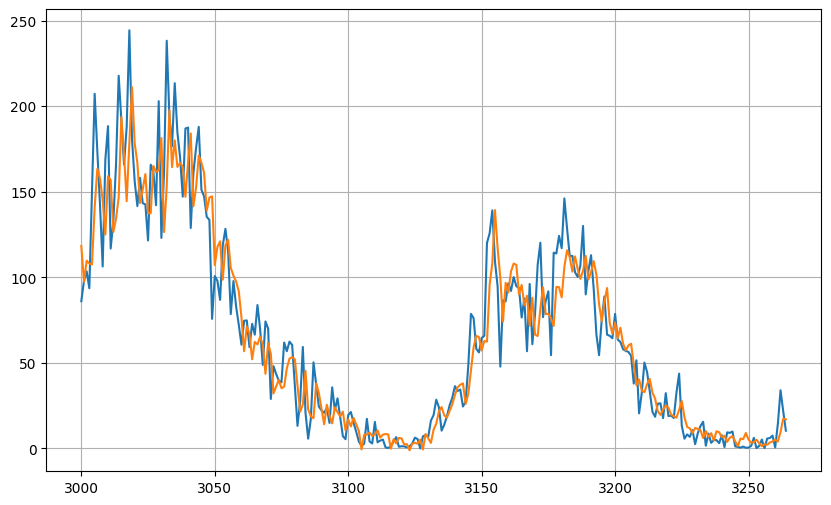

In [122]:
# Reduce the original series
forecast_series = series_array[split_df-size_of_window:-1]



# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, size_of_window, size_of_batch)



# Drop single dimensional axis
results = forecast.squeeze()



# Plot the results
plot_time_series(time_test, (x_test, results))


In [123]:

# Compute the MAE
tf.keras.metrics.mean_absolute_error(x_test, results).numpy()

13.775757

In [ ]:

# Compute the MAE, RMSE, R2-Score
print("MAE: ", mean_absolute_error(x_test, results))
print("RMSE: ", math.sqrt(mean_squared_error(x_test, results)))
print("R2-Score: ", r2_score(x_test, results))

MAE:  13.566499860252973
RMSE:  19.739664141822995
R2-Score:  0.8887031753076448


# <font color=green>Results Obtained:</font>
The obtained results after optimizing the learning rate show a MAE of 13.57, indicating moderate accuracy in predictions. The RMSE is 19.74, suggesting a moderate level of error. The R2-Score of 0.889 indicates that the target variable's variance is explained by the model in about 88.9% of the cases. These results highlight the model's satisfactory performance. The step containing dynamic decay learining rate through built-in ExponentialDecay() has influenced the results in a positive way and lead us to more optimal predicted results by model.

# <font color=green>Conclusion:</font>
Comparing the results of the single DNN model and the combined DNN and Conv1D model, it is observed that the combined model yields better performance in predicting sunspot values on the given dataset after optimizing the learning rate. The single standard DNN model had a MAE of 14.04, RMSE of 20.28, and R2-Score of 0.88, while the combined model achieved a lower MAE of 13.57, RMSE of 19.74, and a higher R2-Score of 0.88. These metrics indicate that the combined model exhibits improved accuracy, reduced prediction error, and a higher proportion of explained sunspot variability. Therefore, the combined DNN and Conv1D model can be considered more effective in capturing complex patterns and dependencies in the sunspot time series data, leading to more accurate predictions.

# References:
https://www.kaggle.com/code/tarkhon/sun-spots-prediction-simple-dnn

https://www.coursera.org/learn/convolutional-neural-networks-tensorflow

https://www.coursera.org/learn/deep-neural-network

https://www.kaggle.com/datasets/robervalt/sunspots

https://www.deeplearning.ai/